# 무비퍼스_영화 흥행도 및 관객 수 예측 분석

## import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [2]:
data = pd.read_excel('naver_merge.xlsx')
data.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,...,dir_score,act_pre_aud,act_score,nv_code,ratings_aud,ratings_critics,ratings_netizen,info,감상포인트,주연
0,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,...,0.65,654386,0,76445,0.0,5.10,7.34,"['액션/SF/스릴러', '0', '12세 관람가', '2011.02.24', 'D...",NaN,"['알렉스 페티퍼', '티모시 올리펀트', '테레사 팔머']"
1,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,...,1.03,475309,0,102278,0.0,8.19,6.94,"['액션/모험/스릴러', '857', '15세 관람가', '2017.02.08', ...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['빈 디젤', '사무엘 L. 잭슨', '루비 로즈', '니나 도브레브']"


## 지수화

### 감독 지수

In [3]:
dir_data = data

In [4]:
dir_data['dir_pre_cnt'] = int(0) # 이전 작품 수
dir_data['dir_pre_aud'] = dir_data['sum_audience'] # 이전 누적 관객수

In [5]:
dir_count = dir_data[['title','director']].groupby('director').count()
dir_count = dir_count.reset_index()
dir_count

,director,title
0,D.J. 카루소,2
1,F. 게리 그레이,3
2,J.J. 에이브럼스,3
3,M. 나이트 샤말란,5
4,M.J. 버세트,1
...,...,...
1035,후안 안토니오 바요나,2
1036,후쿠다 유이치,1
1037,히라야마 미호,1
1038,히라오 타카유키,1


In [6]:
dir_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   director  1040 non-null   object
 1   title     1040 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.4+ KB


In [7]:
dir_pre_data = dir_data.sort_values(by=['director','title', 'opening_date'])
dir_pre_data.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,...,dir_score,act_pre_aud,act_score,nv_code,ratings_aud,ratings_critics,ratings_netizen,info,감상포인트,주연
0,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,...,0.65,654386,0,76445,0.0,5.10,7.34,"['액션/SF/스릴러', '0', '12세 관람가', '2011.02.24', 'D...",NaN,"['알렉스 페티퍼', '티모시 올리펀트', '테레사 팔머']"
1,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,...,1.03,475309,0,102278,0.0,8.19,6.94,"['액션/모험/스릴러', '857', '15세 관람가', '2017.02.08', ...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['빈 디젤', '사무엘 L. 잭슨', '루비 로즈', '니나 도브레브']"


In [8]:
dir_pre_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1473
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            1474 non-null   object        
 1   opening_date     1474 non-null   datetime64[ns]
 2   sum_sales        1474 non-null   int64         
 3   sum_audience     1474 non-null   int64         
 4   screens          1474 non-null   int64         
 5   shows            1474 non-null   int64         
 6   main_nation      1474 non-null   object        
 7   producer         668 non-null    object        
 8   distributor      1474 non-null   object        
 9   rated            1474 non-null   object        
 10  genre            1474 non-null   object        
 11  director         1474 non-null   object        
 12  actor            1474 non-null   object        
 13  year             1474 non-null   int64         
 14  dir_pre_cnt      1474 non-null   int64  

In [9]:
dir_count.loc[0,['director']]

director    D.J. 카루소
Name: 0, dtype: object

In [10]:
tmp_data = dir_data[dir_data['director']=='D.J. 카루소'].sort_values(by=['opening_date'])
idx_list = list(tmp_data.index)
idx_list

[0, 1]

In [11]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            2 non-null      object        
 1   opening_date     2 non-null      datetime64[ns]
 2   sum_sales        2 non-null      int64         
 3   sum_audience     2 non-null      int64         
 4   screens          2 non-null      int64         
 5   shows            2 non-null      int64         
 6   main_nation      2 non-null      object        
 7   producer         0 non-null      object        
 8   distributor      2 non-null      object        
 9   rated            2 non-null      object        
 10  genre            2 non-null      object        
 11  director         2 non-null      object        
 12  actor            2 non-null      object        
 13  year             2 non-null      int64         
 14  dir_pre_cnt      2 non-null      int64        

In [12]:
def dir_pre_add(dir_count, dir_pre_data):
    for i in range(0, len(dir_count)):
        name     = dir_count.loc[i,'director']
        count    = dir_count.loc[i,'title']   # title 이지만 count 값을 나타냄
        tmp_data = dir_pre_data[dir_pre_data['director']==name].sort_values(by=['opening_date'])
        #print(f'name: {name}, count: {count}')
        k = 0
        if (count == len(tmp_data)):
            for j in range(0, len(tmp_data)):
                # if j == 0:
                #     print(f"name:{name}, idx: {j}, dir_pre_cnt:{tmp_data.iloc[j]['dir_pre_cnt']}, dir_pre_aud:{tmp_data.iloc[j]['dir_pre_aud']}")
                # else :
                if j > 0 :
                    tmp_data.iloc[j,14] = j
                    tmp_data.iloc[j,15] = tmp_data.iloc[j]['dir_pre_aud'] + tmp_data.iloc[j-1]['dir_pre_aud']
                    #print(f"name:{name}, idx: {j}, dir_pre_cnt:{tmp_data.iloc[j]['dir_pre_cnt']}, dir_pre_aud:{tmp_data.iloc[j]['dir_pre_aud']}")
        idx_list = list(tmp_data.index)
        #print(idx_list)
        for i, idx in enumerate(idx_list):
            # print(i, idx, dir_pre_data.loc[idx,'dir_pre_cnt'], tmp_data.iloc[i]['dir_pre_cnt'],
            #       dir_pre_data.loc[idx,'dir_pre_aud'], tmp_data.iloc[i]['dir_pre_aud'])
            dir_pre_data.loc[idx,'dir_pre_cnt'] = tmp_data.iloc[i]['dir_pre_cnt']
            dir_pre_data.loc[idx,'dir_pre_aud'] = tmp_data.iloc[i]['dir_pre_aud']

In [13]:
# 감독 지수 만들기
dir_pre_add(dir_count, dir_pre_data)

In [14]:
# min - max 사이 percent 점수 구하기
def func_dir_scored(audience):
    cat = 0
    if audience < 1000000: cat = np.round(audience / 10**6,2)
    elif audience < 5000000 : cat = 1 + np.round((audience-10**6) / (5*(10**6)-10**6),2)
    elif audience < 7000000 : cat = 2 + np.round((audience-(5*10**6)) / (7*(10**6)-(5*10**6)),2)
    elif audience < 10000000 : cat = 3 + np.round((audience-(7*10**6)) / (10**7-(7*10**6)),2)
    else : cat = 4 + np.round((audience - 10**7) / (15*(10**7)-(10**7)),2)
    return cat

In [15]:
# test
func_dir_scored(12*10**6 + 1000000)

4.02

In [16]:
dir_pre_data['dir_score'] = int(0)

In [17]:
dir_pre_data['dir_score']=  dir_pre_data['dir_pre_aud'].apply(func_dir_scored)

In [18]:
# 감독 지수 테스트 하기
# dir_pre_data.dir_score.value_counts()

In [19]:
# dir_pre_data.dir_pre_cnt.value_counts()

In [20]:
dir_pre_data[dir_pre_data['director']=='F. 게리 그레이']

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,...,dir_score,act_pre_aud,act_score,nv_code,ratings_aud,ratings_critics,ratings_netizen,info,감상포인트,주연
2,맨 인 블랙: 인터내셔널,2019-06-12,7464209570,851917,1151,40520,미국,NaN,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,...,1.89,851917,0,97631,6.46,4.86,5.06,"['액션/코미디/SF', '512', '12세 관람가', '2019.06.12', ...","{'연출': '25%', '연기': '31%', '스토리': '25%', '영상미'...","['크리스 헴스워스', '테사 톰슨']"
3,분노의 질주: 더 익스트림,2017-04-12,29981156348,3653238,1469,113241,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),15세이상관람가,...,1.68,3653238,0,140731,9.18,6.00,8.96,"['액션/범죄/스릴러', '6161', '15세 관람가', '2020.03.19',...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['빈 디젤', '드웨인 존슨', '샤를리즈 테론', '제이슨 스타뎀']"
4,스트레이트 아웃 오브 컴턴,2015-09-10,412749800,48844,185,2766,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),청소년관람불가,...,0.05,48844,0,130957,8.96,7.08,8.84,"['드라마', '311', '', '2015.09.10', 'F. 게리 그레이', ...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['오셔 잭슨 주니어', '코리 호킨스', '제이슨 밋첼']"


### 상관계수

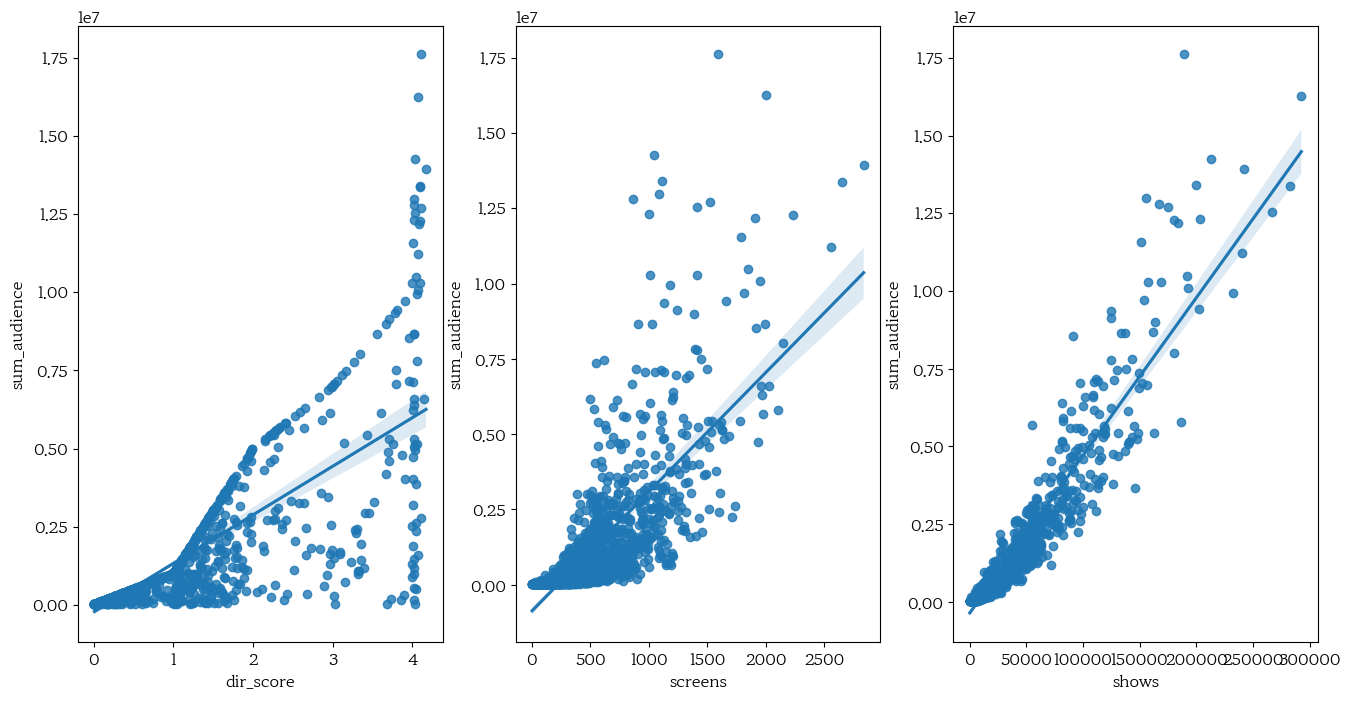

In [21]:
lm_features = ['dir_score', 'screens', 'shows']
fig, axs = plt.subplots(figsize=(16,8) , ncols=3 , nrows=1)
for i , feature in enumerate(lm_features):
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='sum_audience',data=dir_pre_data , ax=axs[i])

### 배우 지수

In [22]:
act_pre_data = dir_pre_data

In [23]:
act_pre_data.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,...,dir_score,act_pre_aud,act_score,nv_code,ratings_aud,ratings_critics,ratings_netizen,info,감상포인트,주연
0,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,...,0.65,654386,0,76445,0.0,5.10,7.34,"['액션/SF/스릴러', '0', '12세 관람가', '2011.02.24', 'D...",NaN,"['알렉스 페티퍼', '티모시 올리펀트', '테레사 팔머']"
1,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,...,1.03,475309,0,102278,0.0,8.19,6.94,"['액션/모험/스릴러', '857', '15세 관람가', '2017.02.08', ...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['빈 디젤', '사무엘 L. 잭슨', '루비 로즈', '니나 도브레브']"


In [24]:
act_pre_data['act_pre_aud'] = act_pre_data['sum_audience'] # 이전 누적 관객수
act_pre_data['act_score'] = float(0.)

In [25]:
# 수정중
# for idx, row in act_pre_data.iterrows() :
#     try :
#         act1 = row.actor.split(',')[0]
#         act2 = row.actor.split(',')[1]
#     except:
#         act1 = row.actor.split(',')[0]
#         act1 = 'NaN'
        
#     print(act1,'/', act_pre_data[act_pre_data['actor'].str.contains(act1)].index)
#     print(act2, '/', act_pre_data[act_pre_data['actor'].str.contains(act2)].index)


In [26]:
# act_grp_count['act01','act02'].get_group('제임스 코든').count()

# act_count2 = pd.DataFrame(act_pre_data.groupby('act02')['act02'].count().reset_index(name='count'))
# act_count2



# tmp_data = dir_data[dir_data['director']=='D.J. 카루소'].sort_values(by=['opening_date'])
# idx_list = list(tmp_data.index)
# idx_list

# # 수정중
# def dir_pre_add(dir_count, dir_pre_data): 
#     for i in range(0, 2):
#         name     = dir_count.loc[i,'director']  
#         count    = dir_count.loc[i,'title']   # title 이지만 count 값을 나타냄
#         tmp_data = dir_pre_data[dir_pre_data['director']==name].sort_values(by=['opening_date'])
#         #print(f'name: {name}, count: {count}')
#         k = 0
#         if (count == len(tmp_data)):
#             for j in range(0, len(tmp_data)):
#                 if j == 0:
#                     print(f"name:{name}, idx: {j}, dir_pre_cnt:{tmp_data.iloc[j]['dir_pre_cnt']}, dir_pre_aud:{tmp_data.iloc[j]['dir_pre_aud']}")
#                 else :
#                     print(f'bef k:{k}')
#                     tmp_data.iloc[j,14] = j 
#                     tmp_data.iloc[j,15] = tmp_data.iloc[j]['dir_pre_aud'] + tmp_data.iloc[j-1]['dir_pre_aud']
#                     print(f"name:{name}, idx: {j}, dir_pre_cnt:{tmp_data.iloc[j]['dir_pre_cnt']}, dir_pre_aud:{tmp_data.iloc[j]['dir_pre_aud']}")
                
#         idx_list = list(tmp_data.index)
#         print(idx_list)
#         for i, idx in enumerate(idx_list):
#             print(i, idx, dir_pre_data.loc[idx,'dir_pre_cnt'], tmp_data.iloc[i]['dir_pre_cnt'], 
#                   dir_pre_data.loc[idx,'dir_pre_aud'], tmp_data.iloc[i]['dir_pre_aud'])
#             dir_pre_data.loc[idx,'dir_pre_cnt'] = tmp_data.iloc[i]['dir_pre_cnt']
#             dir_pre_data.loc[idx,'dir_pre_aud'] = tmp_data.iloc[i]['dir_pre_aud']

## 네이버 영화정보, 평점, 주연 가져오기

In [27]:
import ast
import urllib.request

In [28]:
# 코드 가져오기
client_id = "zNy0lMSY0raZjZipmO_1"
client_secret = "ZlPl2DL9sf"

encText = urllib.parse.quote("미니언즈")
yearfrom = '2015'
yearto = '2015'

url = "https://openapi.naver.com/v1/search/movie.json?query=" + encText + '&yearfrom=' + yearfrom +  '&yearto=' + yearto # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)

request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)

response = urllib.request.urlopen(request)

rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    data = ast.literal_eval(response_body.decode('utf-8'))
    print(data['items'][0]['link'].replace('\\', '').split('=')[1])
    
else:
    print("Error Code:" + rescode)

113351


In [29]:
from get import data
from get import ratings
from get import actor

In [30]:
codes = ['191634', '69105', '52420', '101062', '90834', '89294']
datas = []

for i in codes:
    temp_data = data(i)

    temp_ratings = ratings(i)
    temp_ratings = {'평점': temp_ratings}

    temp_actor = actor(i)
    temp_actor = {'주연': temp_actor}

    temp_data.update(temp_ratings)
    temp_data.update(temp_actor)
    datas.append(temp_data)

print(datas)

[{'title': '미니언즈2', 'ratings': [7.9, 5.67, 7.68], 'info': ['애니메이션/모험/코미디', '2022.07.20', '전체 관람가', '카일 발다'], '평점': {'연출': '21%', '연기': '15%', '스토리': '19%', '영상미': '33%', 'OST': '12%'}, '주연': ['스티브 카렐', '타라지 P. 헨슨', '양자경', '루시 로리스', '장 끌로드 반담']}, {'title': '월-E', 'ratings': [0.0, 7.88, 9.42], 'info': ['애니메이션/SF/가족/코미디/모험', '2008.08.06', '전체 관람가', '앤드류 스탠튼'], '평점': None, '주연': ['벤 버트', '엘리사 나이트', '제프 갈린', '프레드 윌러드']}, {'title': '용서는 없다', 'ratings': [0.0, 4.96, 7.6], 'info': ['범죄/스릴러', '2010.01.07', '청소년 관람불가', '김형준'], '평점': None, '주연': ['설경구', '류승범', '한혜진']}, {'title': '스니치', 'ratings': [0.0, 4.0, 8.41], 'info': ['액션/드라마/스릴러', '2013.05.09', '15세 관람가', '릭 로먼 워'], '평점': None, '주연': ['드웨인 존슨', '수잔 서랜든', '존 번탈', '나딘 벨라즈퀘즈']}, {'title': '잭 리처', 'ratings': [0.0, 6.43, 7.28], 'info': ['액션', '2013.01.17', '15세 관람가', '크리스토퍼 맥쿼리'], '평점': None, '주연': ['톰 크루즈', '로자먼드 파이크', '로버트 듀발']}, {'title': '토르 : 마법망치의 전설', 'ratings': [0.0, 4.0, 5.6], 'info': ['애니메이션/모험', '2012.02.09', '전체 관람가', '오스카 요나손'], '평점'

## 인코딩

### 관람등급 인코딩

In [31]:
data = dir_pre_data

In [32]:
data.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,...,dir_score,act_pre_aud,act_score,nv_code,ratings_aud,ratings_critics,ratings_netizen,info,감상포인트,주연
0,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,...,0.65,654386,0.0,76445,0.0,5.10,7.34,"['액션/SF/스릴러', '0', '12세 관람가', '2011.02.24', 'D...",NaN,"['알렉스 페티퍼', '티모시 올리펀트', '테레사 팔머']"
1,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,...,1.03,475309,0.0,102278,0.0,8.19,6.94,"['액션/모험/스릴러', '857', '15세 관람가', '2017.02.08', ...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['빈 디젤', '사무엘 L. 잭슨', '루비 로즈', '니나 도브레브']"


In [33]:
# 관람등급 확인
data.rated.unique()

array(['12세이상관람가', '15세이상관람가', '청소년관람불가', '전체관람가'], dtype=object)

In [34]:
rated_new = pd.get_dummies(data['rated'])

In [35]:
rated_new

,12세이상관람가,15세이상관람가,전체관람가,청소년관람불가
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
1469,1,0,0,0
1470,1,0,0,0
1471,0,0,1,0
1472,0,0,1,0


In [36]:
rated_new.columns = ['rated_12', 'rated_15', 'rated_all', 'rated_19']
rated_new

,rated_12,rated_15,rated_all,rated_19
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
1469,1,0,0,0
1470,1,0,0,0
1471,0,0,1,0
1472,0,0,1,0


In [37]:
data.drop(columns=['rated'],inplace=True)
data = pd.concat([data,rated_new],axis=1)
data.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,genre,...,ratings_aud,ratings_critics,ratings_netizen,info,감상포인트,주연,rated_12,rated_15,rated_all,rated_19
0,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,"액션,SF",...,0.00,5.10,7.34,"['액션/SF/스릴러', '0', '12세 관람가', '2011.02.24', 'D...",NaN,"['알렉스 페티퍼', '티모시 올리펀트', '테레사 팔머']",1,0,0,0
1,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,"액션,어드벤처,스릴러",...,0.00,8.19,6.94,"['액션/모험/스릴러', '857', '15세 관람가', '2017.02.08', ...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['빈 디젤', '사무엘 L. 잭슨', '루비 로즈', '니나 도브레브']",0,1,0,0
2,맨 인 블랙: 인터내셔널,2019-06-12,7464209570,851917,1151,40520,미국,NaN,롯데컬처웍스(주)롯데엔터테인먼트,"액션,코미디,SF",...,6.46,4.86,5.06,"['액션/코미디/SF', '512', '12세 관람가', '2019.06.12', ...","{'연출': '25%', '연기': '31%', '스토리': '25%', '영상미'...","['크리스 헴스워스', '테사 톰슨']",1,0,0,0
3,분노의 질주: 더 익스트림,2017-04-12,29981156348,3653238,1469,113241,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),"액션,범죄,스릴러",...,9.18,6.00,8.96,"['액션/범죄/스릴러', '6161', '15세 관람가', '2020.03.19',...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['빈 디젤', '드웨인 존슨', '샤를리즈 테론', '제이슨 스타뎀']",0,1,0,0
4,스트레이트 아웃 오브 컴턴,2015-09-10,412749800,48844,185,2766,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),드라마,...,8.96,7.08,8.84,"['드라마', '311', '', '2015.09.10', 'F. 게리 그레이', ...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['오셔 잭슨 주니어', '코리 호킨스', '제이슨 밋첼']",0,0,0,1


### 장르 인코딩

In [38]:
data['genre'] = data.genre.str.split(',').str.get(0)

In [39]:
data.genre.value_counts()

액션          322
드라마         253
애니메이션       227
코미디         134
공포(호러)       84
스릴러          81
범죄           76
멜로/로맨스       75
SF           46
미스터리         40
판타지          32
사극           31
어드벤처         30
가족           17
전쟁            8
다큐멘터리         6
뮤지컬           5
공연            4
기타            2
서부극(웨스턴)      1
Name: genre, dtype: int64

In [40]:
data['genre'].mask(data['genre'] == '공연', '기타', inplace=True)
data['genre'].mask(data['genre'] == '뮤지컬', '기타', inplace=True)
data['genre'].mask(data['genre'] == '서부극(웨스턴)', '기타', inplace=True)
data['genre'].mask(data['genre'] == 'SF', 'SF/판타지', inplace=True)
data['genre'].mask(data['genre'] == '판타지', 'SF/판타지', inplace=True)

In [41]:
# 장르 변경 확인
data.genre.value_counts()

액션        322
드라마       253
애니메이션     227
코미디       134
공포(호러)     84
스릴러        81
SF/판타지     78
범죄         76
멜로/로맨스     75
미스터리       40
사극         31
어드벤처       30
가족         17
기타         12
전쟁          8
다큐멘터리       6
Name: genre, dtype: int64

In [42]:
genre_new = pd.get_dummies(data['genre'])
genre_new

,SF/판타지,가족,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,미스터리,범죄,사극,스릴러,애니메이션,액션,어드벤처,전쟁,코미디
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1470,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1471,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1472,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [43]:
genre_new.columns = ['genre_fantasy',
                     'genre_family',
                     'genre_horror',
                     'genre_etc',
                     'genre_documentary',
                     'genre_drama',
                     'genre_romance',
                     'genre_mystery',
                     'genre_crime',
                     'genre_historical',
                     'genre_thriller',
                     'genre_animation',
                     'genre_action',
                     'genre_adventure',
                     'genre_war',
                     'genre_comedy'
                    ]
genre_new

,genre_fantasy,genre_family,genre_horror,genre_etc,genre_documentary,genre_drama,genre_romance,genre_mystery,genre_crime,genre_historical,genre_thriller,genre_animation,genre_action,genre_adventure,genre_war,genre_comedy
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1470,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1471,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1472,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [44]:
data.drop(columns=['genre'],inplace=True)
data = pd.concat([data,genre_new],axis=1)
data.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,director,...,genre_romance,genre_mystery,genre_crime,genre_historical,genre_thriller,genre_animation,genre_action,genre_adventure,genre_war,genre_comedy
0,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,D.J. 카루소,...,0,0,0,0,0,0,1,0,0,0
1,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,D.J. 카루소,...,0,0,0,0,0,0,1,0,0,0
2,맨 인 블랙: 인터내셔널,2019-06-12,7464209570,851917,1151,40520,미국,NaN,롯데컬처웍스(주)롯데엔터테인먼트,F. 게리 그레이,...,0,0,0,0,0,0,1,0,0,0
3,분노의 질주: 더 익스트림,2017-04-12,29981156348,3653238,1469,113241,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),F. 게리 그레이,...,0,0,0,0,0,0,1,0,0,0
4,스트레이트 아웃 오브 컴턴,2015-09-10,412749800,48844,185,2766,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),F. 게리 그레이,...,0,0,0,0,0,0,0,0,0,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1473
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1474 non-null   object        
 1   opening_date       1474 non-null   datetime64[ns]
 2   sum_sales          1474 non-null   int64         
 3   sum_audience       1474 non-null   int64         
 4   screens            1474 non-null   int64         
 5   shows              1474 non-null   int64         
 6   main_nation        1474 non-null   object        
 7   producer           668 non-null    object        
 8   distributor        1474 non-null   object        
 9   director           1474 non-null   object        
 10  actor              1474 non-null   object        
 11  year               1474 non-null   int64         
 12  dir_pre_cnt        1474 non-null   int64         
 13  dir_pre_aud        1474 non-null   int64         
 14  dir_scor

In [46]:
data.columns

Index(['title', 'opening_date', 'sum_sales', 'sum_audience', 'screens',
       'shows', 'main_nation', 'producer', 'distributor', 'director', 'actor',
       'year', 'dir_pre_cnt', 'dir_pre_aud', 'dir_score', 'act_pre_aud',
       'act_score', 'nv_code', 'ratings_aud', 'ratings_critics',
       'ratings_netizen', 'info', '감상포인트', '주연', 'rated_12', 'rated_15',
       'rated_all', 'rated_19', 'genre_fantasy', 'genre_family',
       'genre_horror', 'genre_etc', 'genre_documentary', 'genre_drama',
       'genre_romance', 'genre_mystery', 'genre_crime', 'genre_historical',
       'genre_thriller', 'genre_animation', 'genre_action', 'genre_adventure',
       'genre_war', 'genre_comedy'],
      dtype='object')

In [47]:
# df_data = data.groupby('title')['year', 'sum_sales', 'sum_audience', 'screens', 'shows', 'main_nation', 'rated', 'main_genre'].sum()
# df_data.head(2)
# df_data.reset_index(inplace=True)
# df_data

In [48]:
# fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
# cat_features = ['sum_sales', 'sum_audience', 'screens', 'shows', 'main_nation', 'rated', 'year', 'main_genre']
# for i, feature in enumerate(cat_features):
#     row = int(i/4)
#     col = i%4
#     sns.barplot(x=title, y=feature, data=df_data, ax=axs[row][col])

### 국가 인코딩

In [49]:
data.main_nation.value_counts()

미국          708
한국          554
일본           81
영국           35
프랑스          22
중국           19
스페인           8
홍콩            8
러시아           7
독일            7
캐나다           5
벨기에           5
인도            3
덴마크           2
호주            2
핀란드           2
체코            1
인도네시아         1
멕시코           1
스웨덴           1
남아프리카공화국      1
이탈리아          1
Name: main_nation, dtype: int64

In [50]:
nation_new = pd.get_dummies(data['main_nation'])
nation_new

,남아프리카공화국,덴마크,독일,러시아,멕시코,미국,벨기에,스웨덴,스페인,영국,...,인도네시아,일본,중국,체코,캐나다,프랑스,핀란드,한국,호주,홍콩
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1470,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1471,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1472,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [51]:
nation_new.columns

Index(['남아프리카공화국', '덴마크', '독일', '러시아', '멕시코', '미국', '벨기에', '스웨덴', '스페인', '영국',
       '이탈리아', '인도', '인도네시아', '일본', '중국', '체코', '캐나다', '프랑스', '핀란드', '한국',
       '호주', '홍콩'],
      dtype='object')

In [52]:
len(nation_new.columns)

22

In [53]:
nation_new.columns = ['nation_SouthAfrica',
                     # 'nation_NewZealand',
                     'nation_Denmark',
                     'nation_Germany',
                     'nation_Russia',
                     'nation_Mexico',
                     'nation_US',
                     'nation_Belgium',
                     'nation_Sweden',
                     'nation_Spain',
                     # 'nation_Iceland',
                     'nation_England',
                     'nation_Italy',
                     'nation_India',
                     'nation_Indonesia',
                     'nation_Japan',
                     'nation_China',
                     'nation_Czech',
                     'nation_Canada',
                     'nation_France',
                     'nation_Finland',
                     'nation_Korea',
                     'nation_Australia',
                     'nation_HongKong']

In [56]:
nation_new

,nation_SouthAfrica,nation_Denmark,nation_Germany,nation_Russia,nation_Mexico,nation_US,nation_Belgium,nation_Sweden,nation_Spain,nation_England,...,nation_Indonesia,nation_Japan,nation_China,nation_Czech,nation_Canada,nation_France,nation_Finland,nation_Korea,nation_Australia,nation_HongKong
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1470,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1471,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1472,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [54]:
data.drop(columns=['main_nation'],inplace=True)
data = pd.concat([data,nation_new],axis=1)
data.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,producer,distributor,director,actor,...,nation_Indonesia,nation_Japan,nation_China,nation_Czech,nation_Canada,nation_France,nation_Finland,nation_Korea,nation_Australia,nation_HongKong
0,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,D.J. 카루소,"티모시 올리펀트,알렉스 페티퍼",...,0,0,0,0,0,0,0,0,0,0
1,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,NaN,롯데쇼핑㈜롯데엔터테인먼트,D.J. 카루소,"빈 디젤,사무엘 L. 잭슨,루비 로즈,니나 도브레브,토니 콜렛,디피카 파드콘,토니 자",...,0,0,0,0,0,0,0,0,0,0
2,맨 인 블랙: 인터내셔널,2019-06-12,7464209570,851917,1151,40520,NaN,롯데컬처웍스(주)롯데엔터테인먼트,F. 게리 그레이,"크리스 헴스워스,테사 톰슨,리암 니슨,엠마 톰슨",...,0,0,0,0,0,0,0,0,0,0
3,분노의 질주: 더 익스트림,2017-04-12,29981156348,3653238,1469,113241,NaN,유니버설픽쳐스인터내셔널 코리아(유),F. 게리 그레이,"빈 디젤,드웨인 존슨,샤를리즈 테론,제이슨 스타뎀,스콧 이스트우드,커트 러셀,미셸 ...",...,0,0,0,0,0,0,0,0,0,0
4,스트레이트 아웃 오브 컴턴,2015-09-10,412749800,48844,185,2766,NaN,유니버설픽쳐스인터내셔널 코리아(유),F. 게리 그레이,"오셔 잭슨 주니어,코리 호킨스,제이슨 미첼,닐 브라운 주니어,알디스 호지,폴 지아마티",...,0,0,0,0,0,0,0,0,0,0


In [55]:
#데이터 검증
data.to_excel('data_mv3.xlsx', index=False)